Challenge Set 1

Topic: Explore MTA turnstile data

Date: 1/13/2016

Name: Justin Stewart

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('2013_movies.csv')

In [3]:
print df.head()

                             Title     Budget  DomesticTotalGross  \
0  The Hunger Games: Catching Fire  130000000           424668047   
1                       Iron Man 3  200000000           409013994   
2                           Frozen  150000000           400738009   
3                  Despicable Me 2   76000000           368061265   
4                     Man of Steel  225000000           291045518   

                    Director Rating  Runtime          ReleaseDate  
0           Francis Lawrence  PG-13      146  2013-11-22 00:00:00  
1                Shane Black  PG-13      129  2013-05-03 00:00:00  
2     Chris BuckJennifer Lee     PG      108  2013-11-22 00:00:00  
3  Pierre CoffinChris Renaud     PG       98  2013-07-03 00:00:00  
4                Zack Snyder  PG-13      143  2013-06-14 00:00:00  


# Challenge 1

Plot domestic total gross over time.

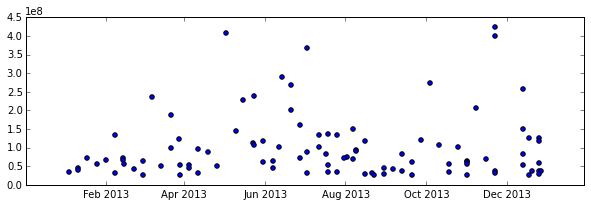

In [16]:
%matplotlib inline
plt.figure(figsize=(10,3))
dates = [date.date() for date in pd.to_datetime(df.ReleaseDate)]
plt.scatter(dates,df.DomesticTotalGross)


# Challenge 2

Plot runtime vs. domestic total gross.

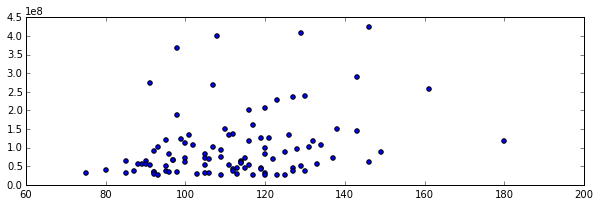

In [17]:
%matplotlib inline
plt.figure(figsize=(10,3))
plt.scatter(df.Runtime,df.DomesticTotalGross)


# Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

# Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

# Challenge 5

What director in your dataset has the highest gross per movie?

# Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."